# Classificação dos Captchas

In [1]:
import io
import os
import tempfile

In [20]:
from IPython import display
from IPython.display import Audio
from PIL import Image
import sqlite3

In [3]:
from database import Database
from splitaudio import solve_captcha

In [4]:
def validate(solution):
    ''' Valida a resposta a um captcha '''
    return solution.isalpha() and len(solution) == 6

In [5]:
db = Database()

In [ ]:
for rowid, image, audio, *_ in list(db.get_captchas(split=99)):
    print(rowid)
    Audio(audio, autoplay=True)
    with tempfile.TemporaryDirectory() as tmp_dir:
        os.chdir(tmp_dir)
        solution = solve_captcha(io.BytesIO(audio), tmp_dir)
        if not solution:            
            db.delete_captcha(rowid)        
        else:
            display.clear_output()
            db.set_split(rowid, True)
            image = Image.open(io.BytesIO(image))
            display.display(image)
            solution = input('captcha: ').lower()

In [ ]:

from IPython.display import *
Audio(captcha, autoplay=True)

In [ ]:
captcha = db.get_captcha(201).fetchone()[2]
with tempfile.TemporaryDirectory() as tmp_dir:
    os.chdir(tmp_dir)
    solve_captcha(io.BytesIO(captcha), temp_dir=tmp_dir, clean=False)
    for i in os.listdir():
        print(os.path.abspath(i))
    

In [12]:
rowid, image, audio, *_ = db.get_captcha(201).fetchone()

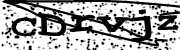

In [24]:
display.Image(image)

In [6]:
captcha = db.get_captcha(201).fetchone()[2]
with tempfile.TemporaryDirectory() as tmp_dir:
    os.chdir(tmp_dir)
    a = solve_captcha(io.BytesIO(captcha), temp_dir=tmp_dir, clean=False)

    Resultado: 0.125 13.2 SOLVED!


In [7]:
a

((0.125, 13.2),
  <_io.BytesIO at 0x7f16307f95c8>])

In [27]:
from IPython.display import *
Audio(a[1][4].getvalue(), autoplay=True)